In [ ]:
#แบบฝึกหัด seasonality เกร็งกำไรตามซีซั่น 🍓

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import starfishX as sx
%config InlineBackend.figure_format='retina'

In [3]:
df = sx.loadHistData_v2(symbol='ichi',start='2010-01-01',end='2020-12-31')

In [4]:
df_monthly_return = df[['Adj Close']].pct_change().groupby(
        [df['Adj Close'].index.year,
         df['Adj Close'].index.month]).mean()
df_monthly_return

Adj Close
Date Date           
2014 4      0.022619
     5      0.014220
     6      0.001667
     7      0.002744
     8      0.001083
...              ...
2020 8      0.000629
     9      0.013952
     10    -0.005388
     11     0.003727
     12    -0.007986

[81 rows x 1 columns]

In [5]:
df_monthly_return = df['Adj Close'].pct_change().groupby(
    [df['Adj Close'].index.year,
     df['Adj Close'].index.month]).mean()

In [6]:
df_monthly_return.sample(5)

Date  Date
2018  5      -0.015027
2020  2       0.000617
2018  1       0.002717
2017  12      0.001118
2018  7       0.002346
Name: Adj Close, dtype: float64

In [9]:
df_montly_return_list=[]
for i in range(len(df_monthly_return)):
    df_montly_return_list.append\
        ({'month':df_monthly_return.index[i][1],
          'monthly_return': df_monthly_return.iloc[i]})

In [10]:
df_montly_return_list=pd.DataFrame(df_montly_return_list,
                                     columns=('month','monthly_return'))


df_montly_return_list

,month,monthly_return
0,4,0.022619
1,5,0.014220
2,6,0.001667
3,7,0.002744
4,8,0.001083
...,...,...
76,8,0.000629
77,9,0.013952
78,10,-0.005388
79,11,0.003727


In [11]:
df_montly_return_list

,month,monthly_return
0,4,0.022619
1,5,0.014220
2,6,0.001667
3,7,0.002744
4,8,0.001083
...,...,...
76,8,0.000629
77,9,0.013952
78,10,-0.005388
79,11,0.003727


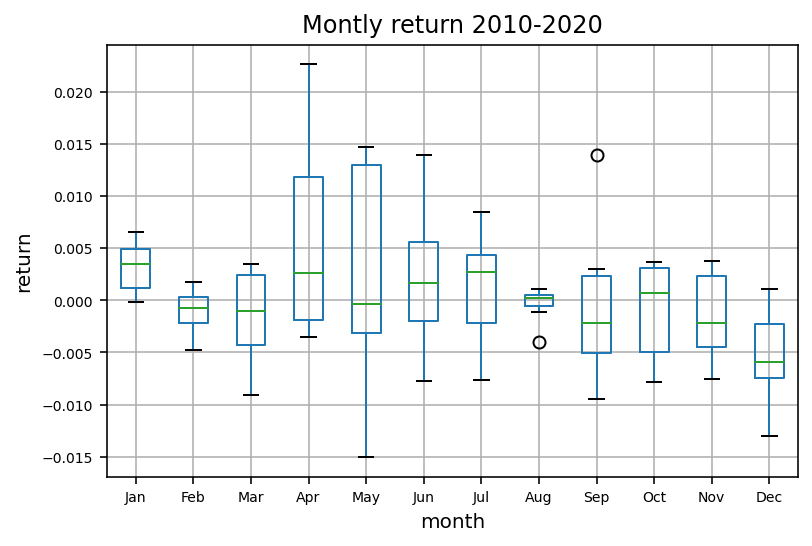

In [12]:
df_montly_return_list.boxplot(column='monthly_return', by='month')
ax = plt.gca()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels=['Jan','Feb','Mar','Apr','May','Jun',\
        'Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(labels)
ax.set_ylabel('return')
plt.tick_params(axis='both', which='major', labelsize=7)
plt.title("Montly return 2010-2020")
plt.suptitle("")
plt.show()

In [13]:
df_montly_return_list.groupby('month')['monthly_return'].mean()

month
1     0.003186
2    -0.001060
3    -0.001591
4     0.005917
5     0.002696
6     0.002162
7     0.001142
8    -0.000401
9    -0.000450
10   -0.001001
11   -0.001474
12   -0.005308
Name: monthly_return, dtype: float64

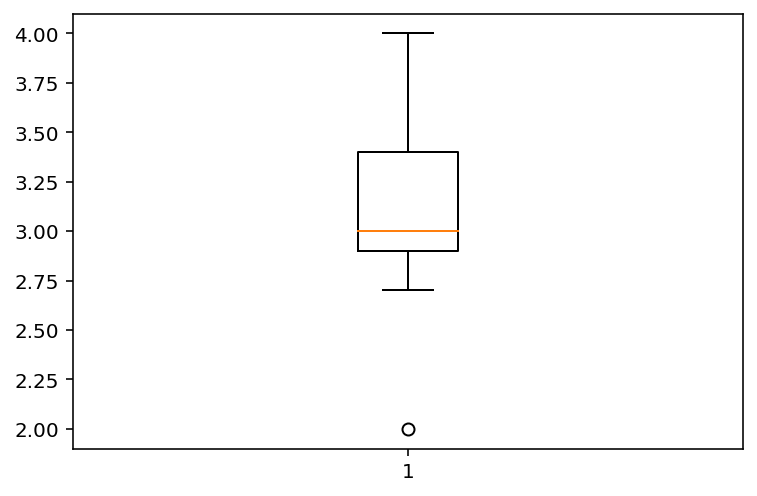

In [15]:
data = [3,3.4,3.4,3.42,3.5,2.9,2.7,3,3,3,3.1,3.2,3.21,2.9,2.9,4,2]
plt.boxplot(data)
plt.show()

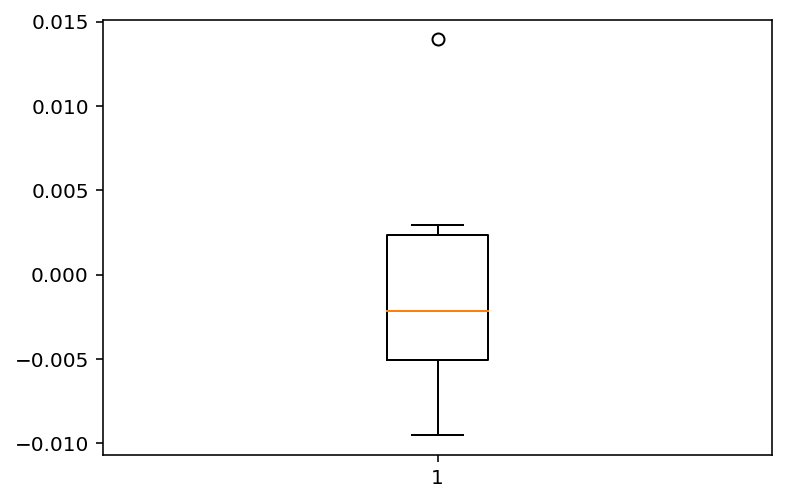

In [16]:
m = df_montly_return_list[df_montly_return_list['month']==9]['monthly_return']
plt.boxplot(m)
plt.show()

In [17]:
df_monthly_return = df['Adj Close'].pct_change().groupby([df['Adj Close'].index.month]).mean()

<AxesSubplot:xlabel='Date'>

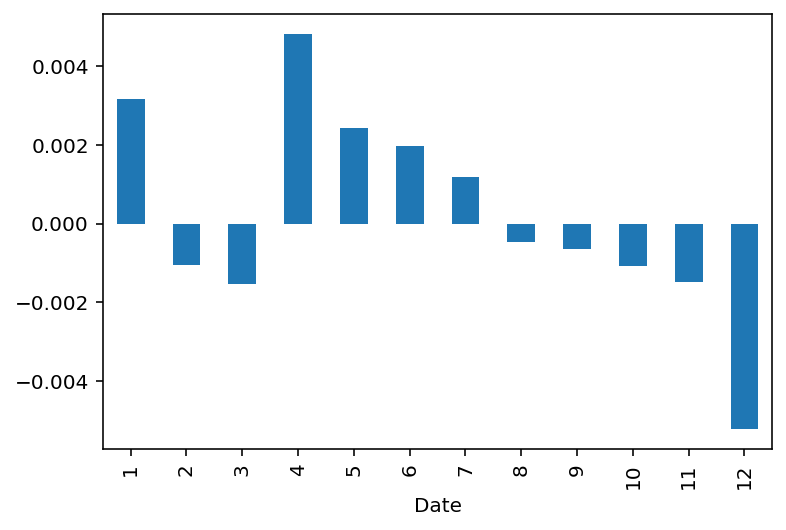

In [18]:
df_monthly_return.plot(kind='bar')